<a href="https://colab.research.google.com/github/SanthoshKasam2104/ScalerCaseStudies/blob/main/OLA_Ensemble_Learning_Santhosh_Kumar_Kasam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLA Drivers Churn Prediction**

# Problem Statement:

OLA which is a leading ride sharing platform is aiming to provide reliable, affordable and convenient transportation for all. But the drivers are more inclined to moving to other organisations which became a challenge for the organisation to provide services to customers

# Solution:

Now the organisation wants the data scientist team to analyse and predict the drivers who would leave the organisation. This will help OLA to either retain the customer or plan for a back up

In [33]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

--2024-12-23 17:30:02--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.169.201.165, 3.169.201.143, 3.169.201.14, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.169.201.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv.1’

ola_driver_scaler.c 100%[===================>]   1.08M  --.-KB/s    in 0.07s   

2024-12-23 17:30:02 (14.4 MB/s) - ‘ola_driver_scaler.csv.1’ saved [1127673/1127673]



In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [35]:
df = pd.read_csv('ola_driver_scaler.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [37]:
df = df.drop('Unnamed: 0', axis = 1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [39]:
df.shape

(19104, 13)

In [40]:
df['MMM-YY']=df['MMM-YY'].astype('datetime64[ns]')
df['Dateofjoining']=df['Dateofjoining'].astype('datetime64[ns]')
df['LastWorkingDate']=df['LastWorkingDate'].astype('datetime64[ns]')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [42]:
df.isna().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [43]:
df['Driver_ID'].nunique()

2381

In [44]:
df_numerical = df.select_dtypes(include = np.number)
df_numerical.head()

imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numerical),columns = df_numerical.columns)
df_imputed

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
19099,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [45]:
df['Rating Change'] = df.groupby('Driver_ID')['Quarterly Rating'].diff()
df['Rating Change'] = df['Rating Change'].fillna(0)
df['Rating Change'] = df['Rating Change'].apply(lambda x: -1 if x>0 else 0 if x==0 else 1)

df['Income Change'] = df.groupby('Driver_ID')['Income'].diff()
df['Income Change'] = df['Income Change'].fillna(0)
df['Income Change'] = df['Income Change'].apply(lambda x: 1 if x>0 else 0 if x==0 else -1)

df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating Change,Income Change
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,0,0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,0,0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,1,0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,0,0


In [46]:
df_driver_max = df.groupby('Driver_ID')[['Age','Gender','Grade','Income','LastWorkingDate','Quarterly Rating','Rating Change','Income Change']].max().reset_index()
df_driver_min = df.groupby('Driver_ID')[['Quarterly Rating','Rating Change','Income Change']].min().reset_index()
df_driver_sum = df.groupby(['Driver_ID', 'City', 'Education_Level', 'Dateofjoining', 'Joining Designation'])['Total Business Value'].sum().reset_index()

In [47]:
df_driver_details = df_driver_max.merge(df_driver_min, on = 'Driver_ID', how = 'left')
df_driver_details = df_driver_details.merge(df_driver_sum, on = 'Driver_ID', how = 'left')
df_driver_details.rename(columns = {'Quarterly Rating_x': 'Max Quarterly Rating','Quarterly Rating_y': 'Min Quarterly Rating','Rating Change_x': 'Max Rating Change','Rating Change_y': 'Min Rating Change','Income Change_x': 'Max Income Change','Income Change_y': 'Min Income Change'}, inplace = True)
df_driver_details

,Driver_ID,Age,Gender,Grade,Income,LastWorkingDate,Max Quarterly Rating,Max Rating Change,Max Income Change,Min Quarterly Rating,Min Rating Change,Min Income Change,City,Education_Level,Dateofjoining,Joining Designation,Total Business Value
0,1,28.0,0.0,1,57387,2019-03-11,2,0,0,2,0,0,C23,2,2018-12-24,1,1715580
1,2,31.0,0.0,2,67016,NaT,1,0,0,1,0,0,C7,2,2020-11-06,2,0
2,4,43.0,0.0,2,65603,2020-04-27,1,0,0,1,0,0,C13,2,2019-12-07,2,350000
3,5,29.0,0.0,1,46368,2019-03-07,1,0,0,1,0,0,C9,0,2019-01-09,1,120360
4,6,31.0,1.0,3,78728,NaT,2,0,0,1,-1,0,C11,1,2020-07-31,3,1265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,3,82815,NaT,4,1,0,1,-1,0,C24,0,2015-10-15,2,21748820
2377,2785,34.0,1.0,1,12105,2020-10-28,1,0,0,1,0,0,C9,0,2020-08-28,1,0
2378,2786,45.0,0.0,2,35370,2019-09-22,2,1,0,1,0,0,C19,0,2018-07-31,2,2815090
2379,2787,28.0,1.0,1,69498,2019-06-20,2,1,0,1,0,0,C20,2,2018-07-21,1,977830


In [48]:
df_driver_details.isna().sum()

,0
Driver_ID,0
Age,0
Gender,0
Grade,0
Income,0
LastWorkingDate,765
Max Quarterly Rating,0
Max Rating Change,0
Max Income Change,0
Min Quarterly Rating,0


# Univariate Analysis

In [49]:
df_driver_details.columns

Index(['Driver_ID', 'Age', 'Gender', 'Grade', 'Income', 'LastWorkingDate',
       'Max Quarterly Rating', 'Max Rating Change', 'Max Income Change',
       'Min Quarterly Rating', 'Min Rating Change', 'Min Income Change',
       'City', 'Education_Level', 'Dateofjoining', 'Joining Designation',
       'Total Business Value'],
      dtype='object')

In [50]:
numerical_cols = df_driver_details.select_dtypes(include = np.number).columns
categorical_cols = df_driver_details.select_dtypes(exclude = np.number).columns

In [51]:
numerical_cols

Index(['Driver_ID', 'Age', 'Gender', 'Grade', 'Income', 'Max Quarterly Rating',
       'Max Rating Change', 'Max Income Change', 'Min Quarterly Rating',
       'Min Rating Change', 'Min Income Change', 'Education_Level',
       'Joining Designation', 'Total Business Value'],
      dtype='object')

In [52]:
numerical_data = df_driver_details[numerical_cols]
numerical_data.head()

,Driver_ID,Age,Gender,Grade,Income,Max Quarterly Rating,Max Rating Change,Max Income Change,Min Quarterly Rating,Min Rating Change,Min Income Change,Education_Level,Joining Designation,Total Business Value
0,1,28.0,0.0,1,57387,2,0,0,2,0,0,2,1,1715580
1,2,31.0,0.0,2,67016,1,0,0,1,0,0,2,2,0
2,4,43.0,0.0,2,65603,1,0,0,1,0,0,2,2,350000
3,5,29.0,0.0,1,46368,1,0,0,1,0,0,0,1,120360
4,6,31.0,1.0,3,78728,2,0,0,1,-1,0,1,3,1265000


In [53]:
categorical_cols

Index(['LastWorkingDate', 'City', 'Dateofjoining'], dtype='object')

In [54]:
categorical_data = df_driver_details[categorical_cols]
categorical_data.head()

,LastWorkingDate,City,Dateofjoining
0,2019-03-11,C23,2018-12-24
1,NaT,C7,2020-11-06
2,2020-04-27,C13,2019-12-07
3,2019-03-07,C9,2019-01-09
4,NaT,C11,2020-07-31


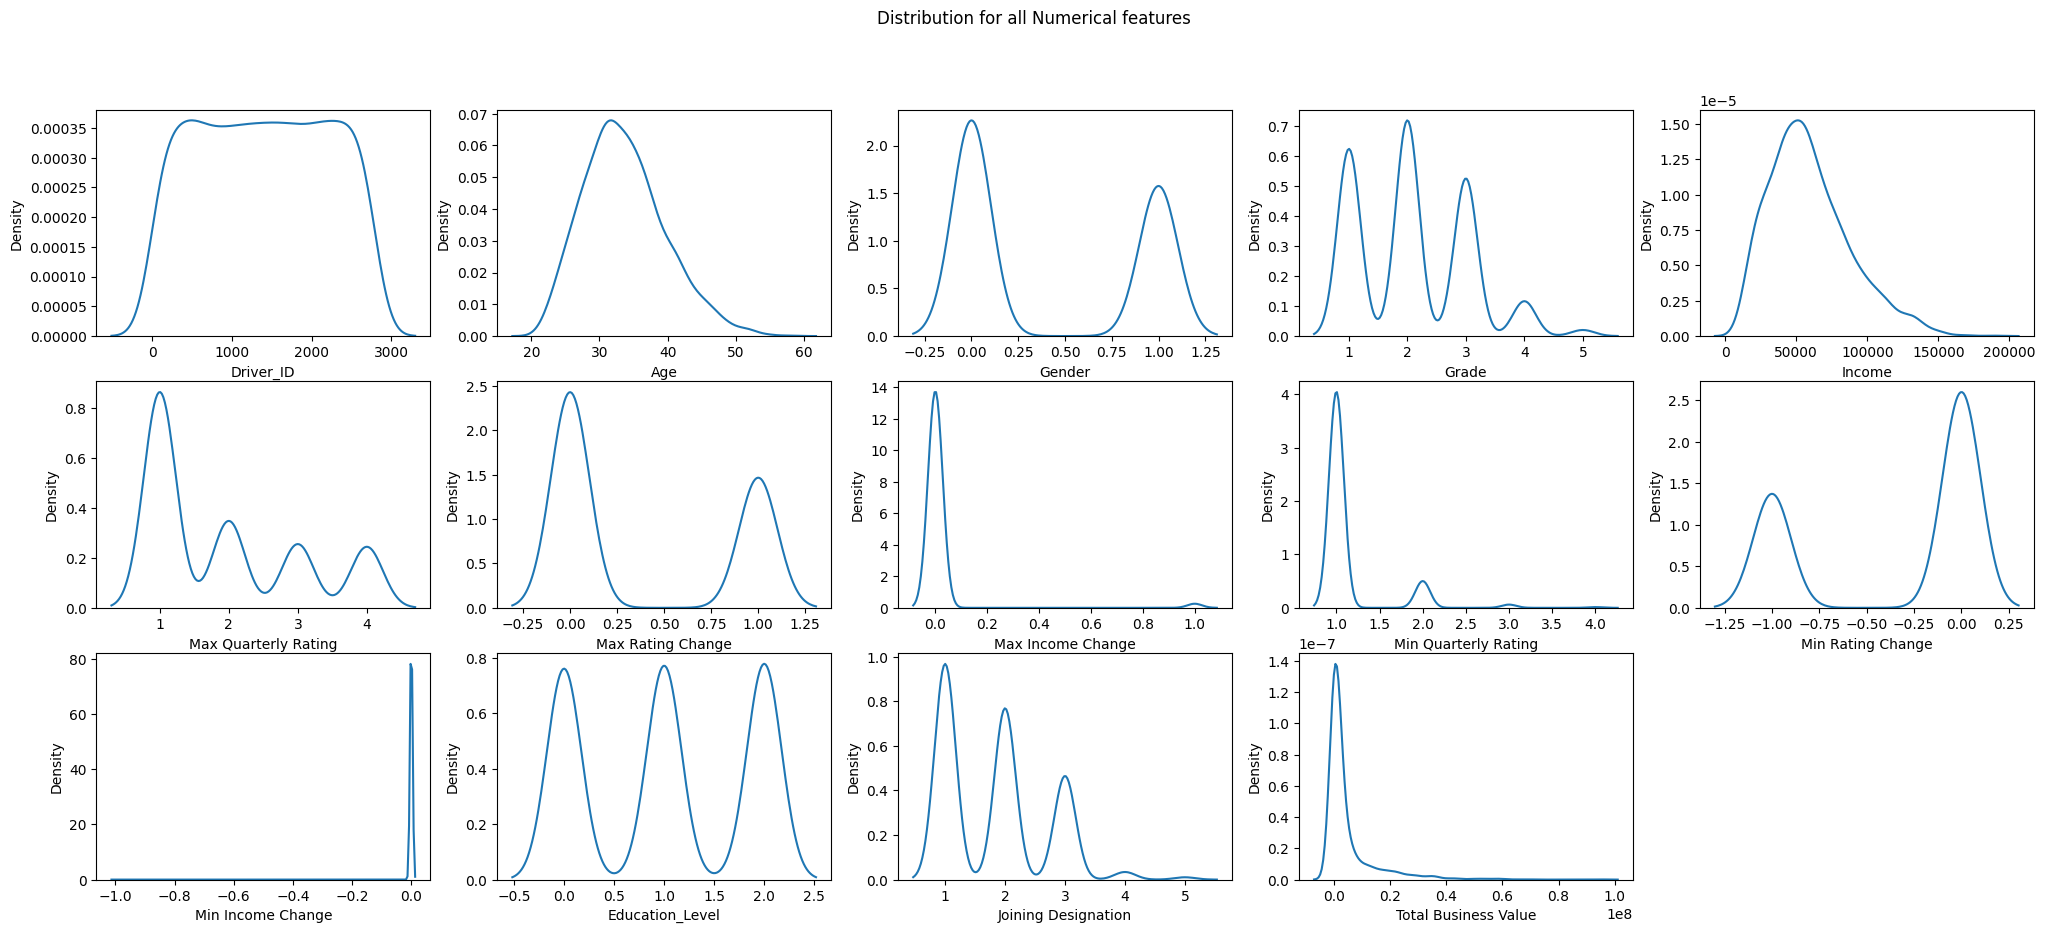

In [55]:
fig = plt.figure(figsize = (25,10))
plt.suptitle("Distribution for all Numerical features")
for x in range(1,len(numerical_data.columns)+1):
  plt.subplot(3,5, x)
  sns.kdeplot(numerical_data[numerical_data.columns[x-1]])
plt.show()

**Insights:**

1. Age and Income are slightly right- skewed
2. Count of male drivers is higher than the female drivers
3. More number of drivers are 12+, then followed by graduates and then 10+
4. Joining designation of majority of the drivers is 1
5. Current grade of majority of drivers is 2
6. Majority of the quarterly rating is very less which is 1 and least is 4

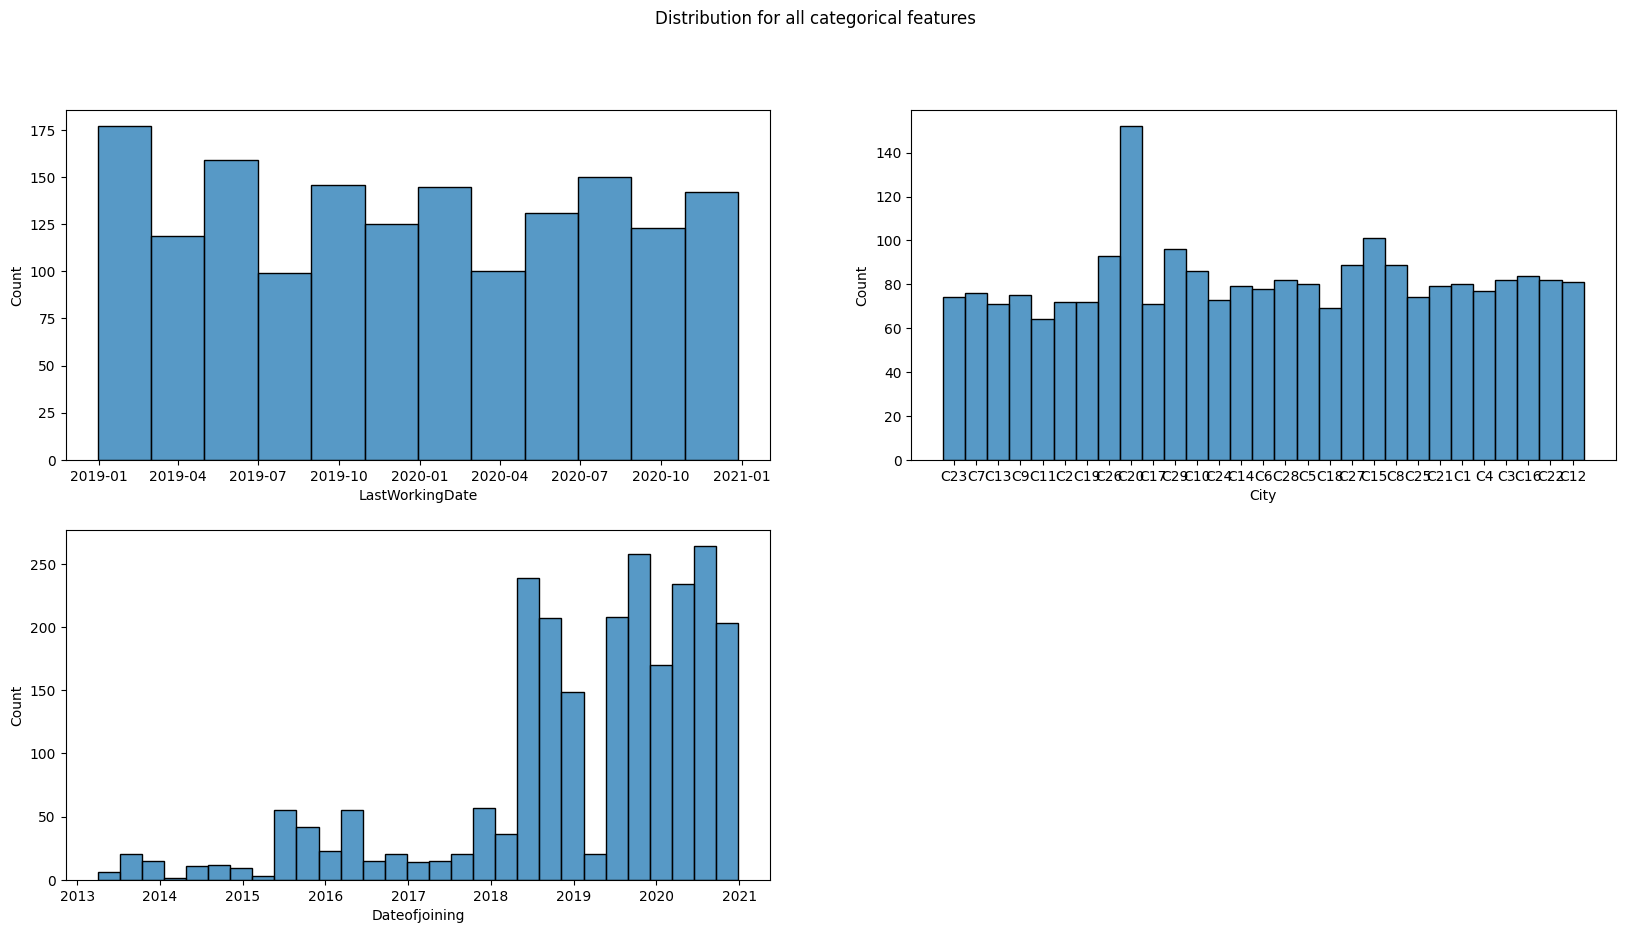

In [56]:
fig = plt.figure(figsize = (20,10))
plt.suptitle("Distribution for all categorical features")
for x in range(1,len(categorical_data.columns)+1):
  plt.subplot(2,2, x)
  sns.histplot(categorical_data[categorical_data.columns[x-1]])
plt.show()

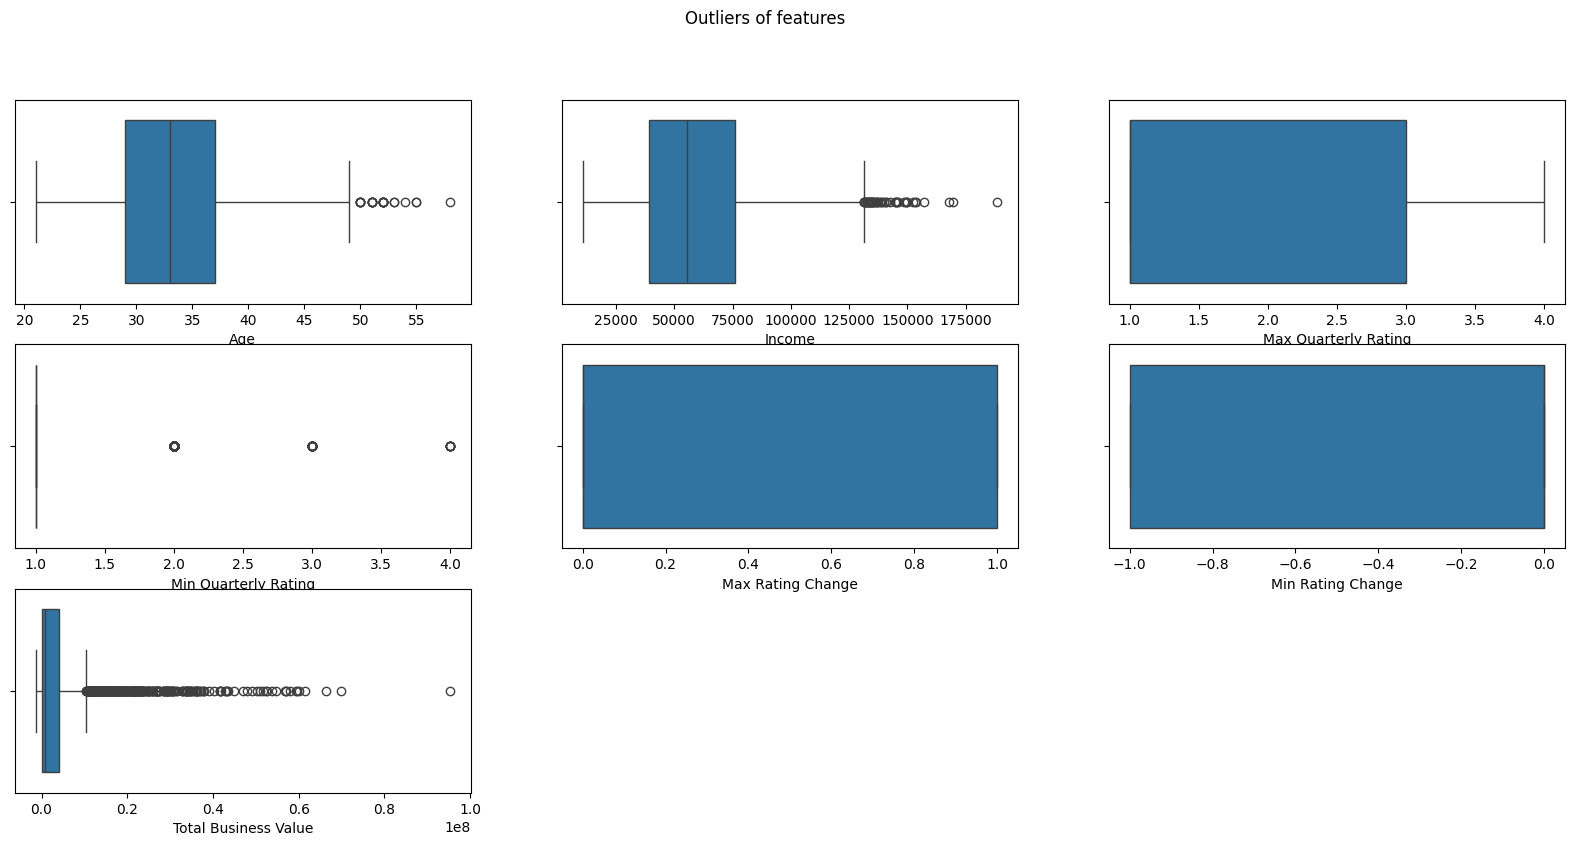

In [57]:
boxplotcolumns = ['Age', 'Income', 'Max Quarterly Rating', 'Min Quarterly Rating','Max Rating Change','Min Rating Change','Total Business Value']

fig = plt.figure(figsize = (20,9))
plt.suptitle("Outliers of features")
for x in range(1,len(boxplotcolumns)+1):
  plt.subplot(3,3, x)
  sns.boxplot(x=df_driver_details[boxplotcolumns[x-1]])
plt.show()

# Bi-Variate Analysis

In [58]:
age_bins = [18,30,50,100]
labels = ['Young','Middle-aged','Senior']
df_driver_details['Age_Group'] = pd.cut(df_driver_details['Age'],bins = age_bins,labels = labels)

In [59]:
df_driver_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   float64       
 3   Grade                 2381 non-null   int64         
 4   Income                2381 non-null   int64         
 5   LastWorkingDate       1616 non-null   datetime64[ns]
 6   Max Quarterly Rating  2381 non-null   int64         
 7   Max Rating Change     2381 non-null   int64         
 8   Max Income Change     2381 non-null   int64         
 9   Min Quarterly Rating  2381 non-null   int64         
 10  Min Rating Change     2381 non-null   int64         
 11  Min Income Change     2381 non-null   int64         
 12  City                  2381 non-null   object        
 13  Education_Level   

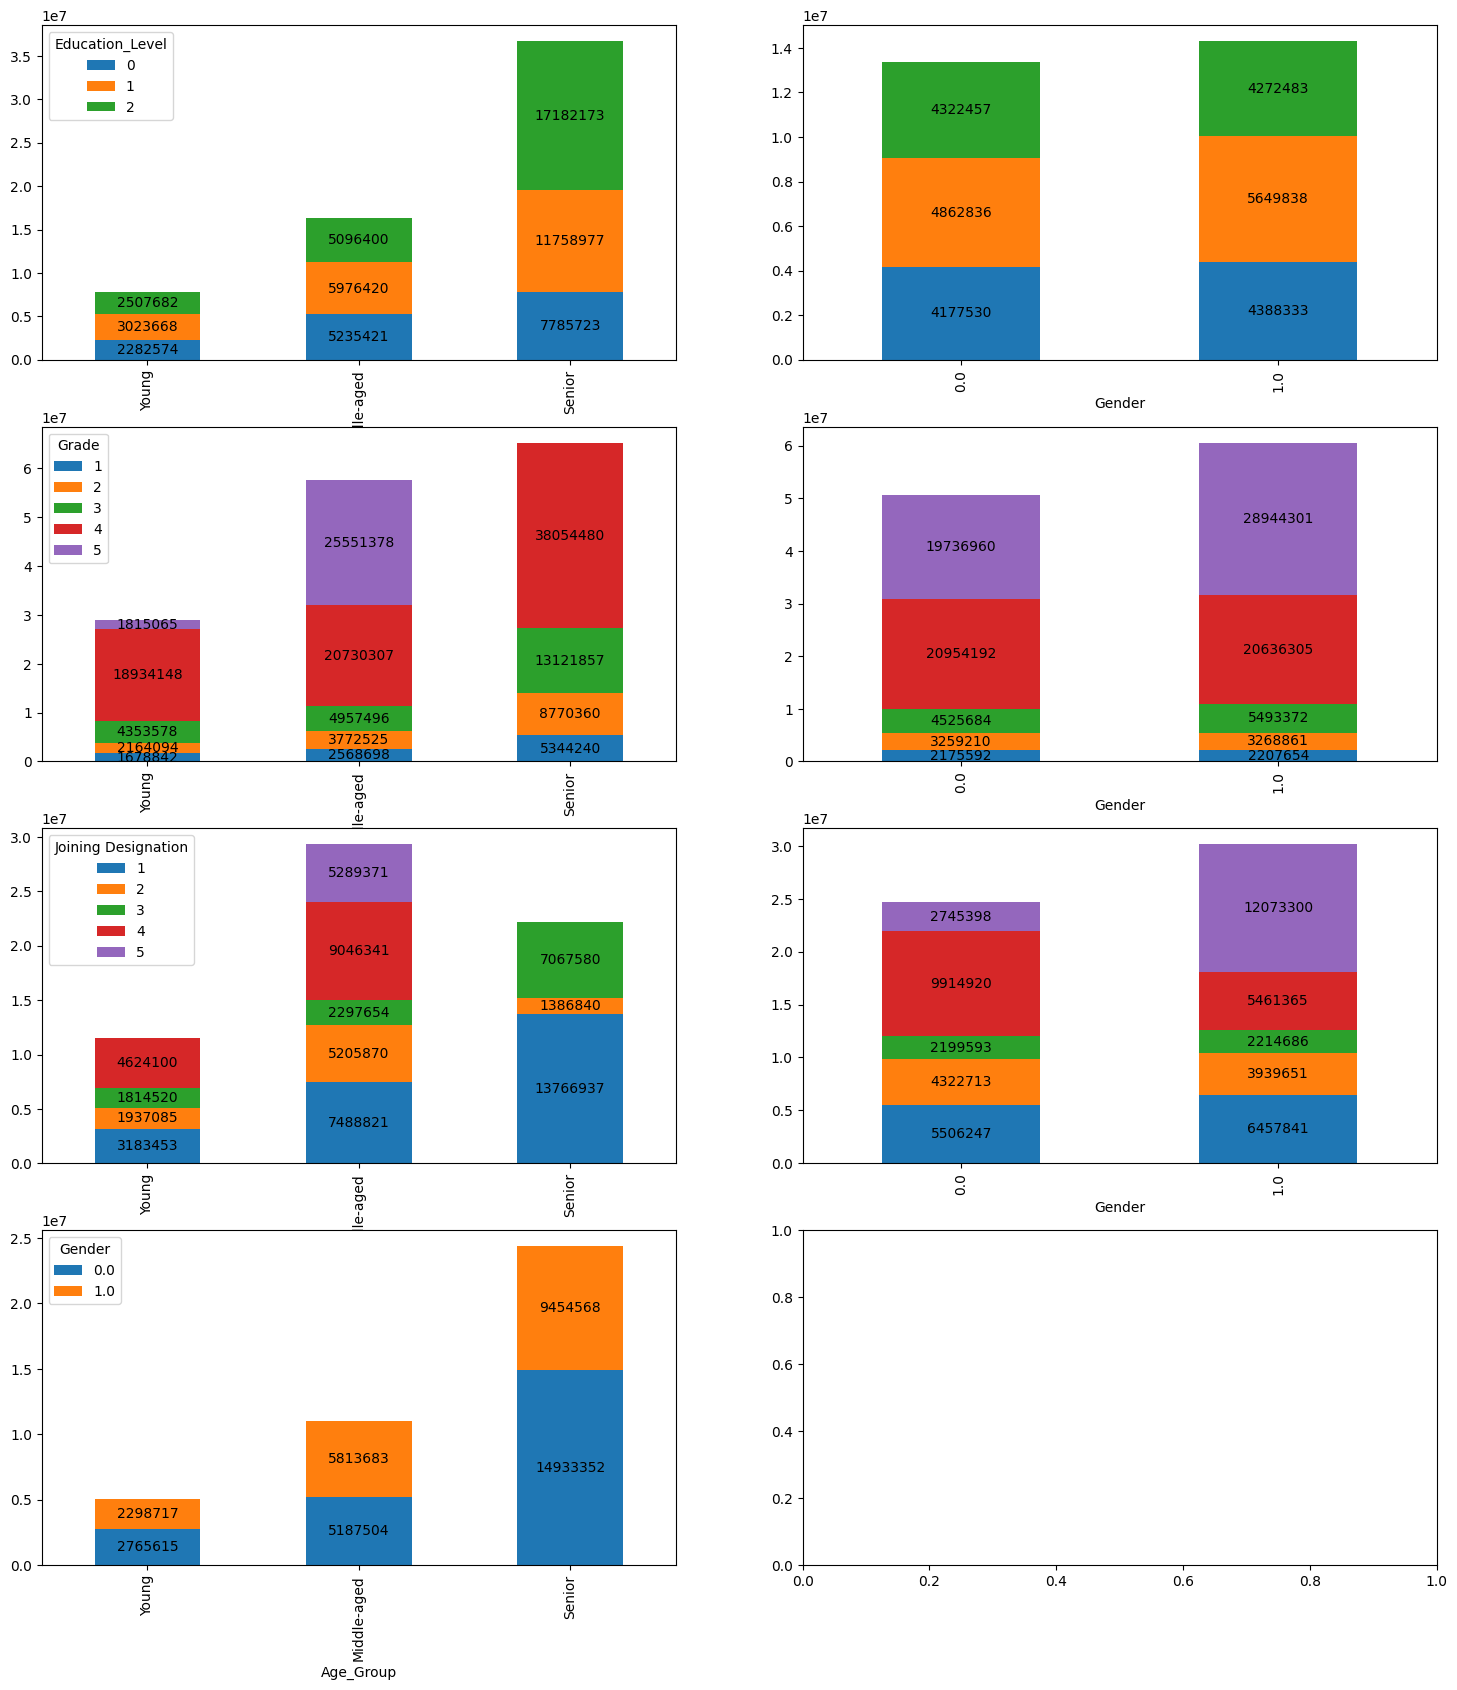

In [60]:
df_age_gender_business = df_driver_details.groupby(['Age_Group','Gender'],observed=True)['Total Business Value'].mean().reset_index()
df_age_gender_business = df_age_gender_business.pivot(index = "Age_Group",columns="Gender",values='Total Business Value').reset_index()

df_age_Education_business = df_driver_details.groupby(['Age_Group','Education_Level'],observed=True)['Total Business Value'].mean().reset_index()
df_age_Education_business = df_age_Education_business.pivot(index = "Age_Group",columns="Education_Level",values='Total Business Value').reset_index()

df_age_grade_business = df_driver_details.groupby(['Age_Group','Grade'],observed=True)['Total Business Value'].mean().reset_index()
df_age_grade_business = df_age_grade_business.pivot(index = "Age_Group",columns="Grade",values='Total Business Value').reset_index()

df_age_Designation_business = df_driver_details.groupby(['Age_Group','Joining Designation'],observed=True)['Total Business Value'].mean().reset_index()
df_age_Designation_business = df_age_Designation_business.pivot(index = "Age_Group",columns="Joining Designation",values='Total Business Value').reset_index()

df_gender_Education_business = df_driver_details.groupby(['Gender','Education_Level'],observed=True)['Total Business Value'].mean().reset_index()
df_gender_Education_business = df_gender_Education_business.pivot(index = "Gender",columns="Education_Level",values='Total Business Value').reset_index()

df_gender_grade_business = df_driver_details.groupby(['Gender','Grade'],observed=True)['Total Business Value'].mean().reset_index()
df_gender_grade_business = df_gender_grade_business.pivot(index = "Gender",columns="Grade",values='Total Business Value').reset_index()

df_gender_Designation_business = df_driver_details.groupby(['Gender','Joining Designation'],observed=True)['Total Business Value'].mean().reset_index()
df_gender_Designation_business = df_gender_Designation_business.pivot(index = "Gender",columns="Joining Designation",values='Total Business Value').reset_index()

fig, axes = plt.subplots(nrows=4, ncols=2)
age_Education_business=df_age_Education_business.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[0,0], figsize = (18,20),legend = True)
for container in age_Education_business.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_Education_business.bar_label(container,labels = labels,label_type = "center")
gender_Education_business=df_gender_Education_business.plot(x="Gender",kind="bar",stacked=True, ax = axes[0,1], figsize = (10,20),legend = False)
for container in gender_Education_business.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  gender_Education_business.bar_label(container,labels = labels,label_type = "center")

age_grade_business=df_age_grade_business.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[1,0], figsize = (18,20),legend = True)
for container in age_grade_business.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_grade_business.bar_label(container,labels = labels,label_type = "center")
gender_grade_business=df_gender_grade_business.plot(x="Gender",kind="bar",stacked=True, ax = axes[1,1], figsize = (10,20),legend = False)
for container in gender_grade_business.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  gender_grade_business.bar_label(container,labels = labels,label_type = "center")

age_Designation_business=df_age_Designation_business.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[2,0], figsize = (18,20),legend = True)
for container in age_Designation_business.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_Designation_business.bar_label(container,labels = labels,label_type = "center")
gender_Designation_business=df_gender_Designation_business.plot(x="Gender",kind="bar",stacked=True, ax = axes[2,1], figsize = (10,20),legend = False)
for container in gender_Designation_business.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  gender_Designation_business.bar_label(container,labels = labels,label_type = "center")

age_gender_business=df_age_gender_business.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[3,0], figsize = (18,20),legend = True)
for container in age_gender_business.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_gender_business.bar_label(container,labels = labels,label_type = "center")

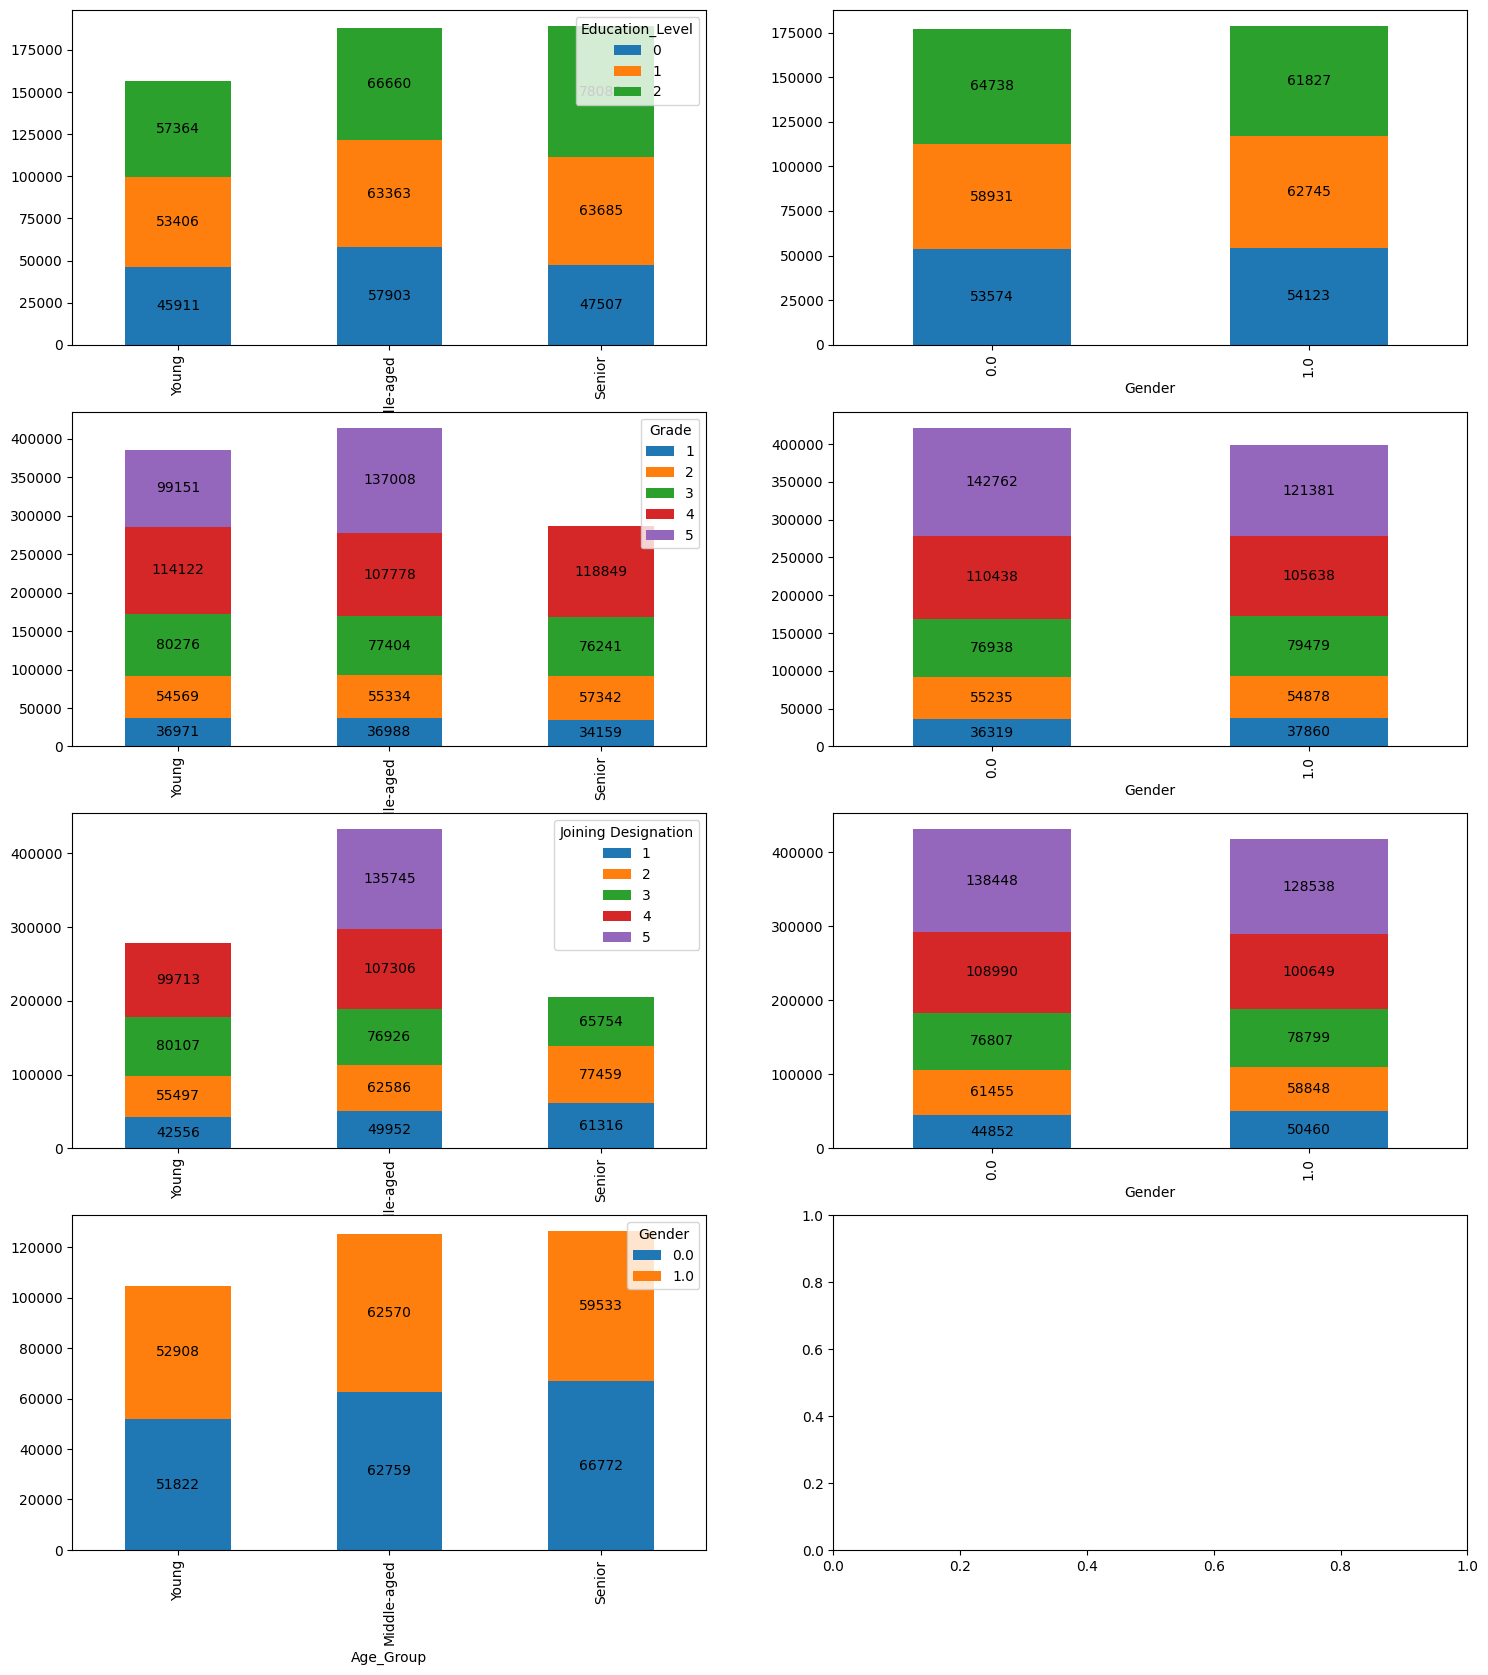

In [61]:
df_age_gender_Income = df_driver_details.groupby(['Age_Group','Gender'],observed=True)['Income'].mean().reset_index()
df_age_gender_Income = df_age_gender_Income.pivot(index = "Age_Group",columns="Gender",values='Income').reset_index()

df_age_Education_Income = df_driver_details.groupby(['Age_Group','Education_Level'],observed=True)['Income'].mean().reset_index()
df_age_Education_Income = df_age_Education_Income.pivot(index = "Age_Group",columns="Education_Level",values='Income').reset_index()

df_age_grade_Income = df_driver_details.groupby(['Age_Group','Grade'],observed=True)['Income'].mean().reset_index()
df_age_grade_Income = df_age_grade_Income.pivot(index = "Age_Group",columns="Grade",values='Income').reset_index()

df_age_Designation_Income = df_driver_details.groupby(['Age_Group','Joining Designation'],observed=True)['Income'].mean().reset_index()
df_age_Designation_Income = df_age_Designation_Income.pivot(index = "Age_Group",columns="Joining Designation",values='Income').reset_index()

df_gender_Education_Income = df_driver_details.groupby(['Gender','Education_Level'],observed=True)['Income'].mean().reset_index()
df_gender_Education_Income = df_gender_Education_Income.pivot(index = "Gender",columns="Education_Level",values='Income').reset_index()

df_gender_grade_Income = df_driver_details.groupby(['Gender','Grade'],observed=True)['Income'].mean().reset_index()
df_gender_grade_Income = df_gender_grade_Income.pivot(index = "Gender",columns="Grade",values='Income').reset_index()

df_gender_Designation_Income = df_driver_details.groupby(['Gender','Joining Designation'],observed=True)['Income'].mean().reset_index()
df_gender_Designation_Income = df_gender_Designation_Income.pivot(index = "Gender",columns="Joining Designation",values='Income').reset_index()

fig, axes = plt.subplots(nrows=4, ncols=2)
age_Education_Income=df_age_Education_Income.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[0,0], figsize = (18,20),legend = True)
for container in age_Education_Income.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_Education_Income.bar_label(container,labels = labels,label_type = "center")
gender_Education_Income=df_gender_Education_Income.plot(x="Gender",kind="bar",stacked=True, ax = axes[0,1], figsize = (10,20),legend = False)
for container in gender_Education_Income.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  gender_Education_Income.bar_label(container,labels = labels,label_type = "center")

age_grade_Income=df_age_grade_Income.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[1,0], figsize = (18,20),legend = True)
for container in age_grade_Income.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_grade_Income.bar_label(container,labels = labels,label_type = "center")
gender_grade_Income=df_gender_grade_Income.plot(x="Gender",kind="bar",stacked=True, ax = axes[1,1], figsize = (10,20),legend = False)
for container in gender_grade_Income.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  gender_grade_Income.bar_label(container,labels = labels,label_type = "center")

age_Designation_Income=df_age_Designation_Income.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[2,0], figsize = (18,20),legend = True)
for container in age_Designation_Income.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_Designation_Income.bar_label(container,labels = labels,label_type = "center")
gender_Designation_Income=df_gender_Designation_Income.plot(x="Gender",kind="bar",stacked=True, ax = axes[2,1], figsize = (10,20),legend = False)
for container in gender_Designation_Income.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  gender_Designation_Income.bar_label(container,labels = labels,label_type = "center")

age_gender_Income=df_age_gender_Income.plot(x="Age_Group",kind="bar",stacked=True, ax = axes[3,0], figsize = (18,20),legend = True)
for container in age_gender_Income.containers:
  labels=[]
  for c in container:
    if c.get_height()>0:
      labels.append(int(c.get_height()))
    else:
      labels.append('')
  age_gender_Income.bar_label(container,labels = labels,label_type = "center")

# Data Preprocessing

In [62]:
df_driver_details['Target'] = df_driver_details['LastWorkingDate'].apply(lambda x: 0 if pd.isna(x) else 1)
df_driver_details['Age_Group'] = df_driver_details['Age_Group'].apply(lambda x: 0 if x == 'Young' else 1 if x == 'Middle-aged' else 2)
df_city_target_mean = df_driver_details.groupby('City')['Target'].mean()
df_driver_details = df_driver_details.merge(df_city_target_mean, on = 'City', how = 'left')
df_driver_details.drop(['City','Driver_ID','LastWorkingDate'],axis = 1, inplace = True)
df_driver_details.rename(columns = {'Target_x':'Target','Target_y':'City_Encoded'}, inplace = True)
df_driver_details['Joining_Year'] = df_driver_details['Dateofjoining'].dt.year
df_driver_details['Joining_Month'] = df_driver_details['Dateofjoining'].dt.month
df_driver_details['Joining_Day'] = df_driver_details['Dateofjoining'].dt.day
df_driver_details.drop(['Dateofjoining'],axis = 1, inplace = True)

In [63]:
df_driver_details

,Age,Gender,Grade,Income,Max Quarterly Rating,Max Rating Change,Max Income Change,Min Quarterly Rating,Min Rating Change,Min Income Change,Education_Level,Joining Designation,Total Business Value,Age_Group,Target,City_Encoded,Joining_Year,Joining_Month,Joining_Day
0,28.0,0.0,1,57387,2,0,0,2,0,0,2,1,1715580,0,1,0.770270,2018,12,24
1,31.0,0.0,2,67016,1,0,0,1,0,0,2,2,0,1,0,0.684211,2020,11,6
2,43.0,0.0,2,65603,1,0,0,1,0,0,2,2,350000,1,1,0.816901,2019,12,7
3,29.0,0.0,1,46368,1,0,0,1,0,0,0,1,120360,0,1,0.706667,2019,1,9
4,31.0,1.0,3,78728,2,0,0,1,-1,0,1,3,1265000,1,0,0.703125,2020,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,3,82815,4,1,0,1,-1,0,0,2,21748820,1,0,0.698630,2015,10,15
2377,34.0,1.0,1,12105,1,0,0,1,0,0,0,1,0,1,1,0.706667,2020,8,28
2378,45.0,0.0,2,35370,2,1,0,1,0,0,0,2,2815090,1,1,0.569444,2018,7,31
2379,28.0,1.0,1,69498,2,1,0,1,0,0,2,1,977830,0,1,0.730263,2018,7,21
